In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV en DataFrames de pandas
df_morfologicas = pd.read_csv("output/metricas_morfologicas.csv")
df_reflectancia = pd.read_csv("output/metricas_reflectancia.csv")
df_tallos = pd.read_csv("output/metricas_tallos.csv")
df_ambiente = pd.read_csv("output/sensores_ambiente.csv")
df_humedad = pd.read_csv("output/sensores_humedad.csv")

# Mostrar las primeras 5 filas de cada DataFrame para verificación
print("DataFrame: df_morfologicas")
print(df_morfologicas.head())
print("\nDataFrame: df_reflectancia")
print(df_reflectancia.head())
print("\nDataFrame: df_tallos")
print(df_tallos.head())
print("\nDataFrame: df_ambiente")
print(df_ambiente.head())
print("\nDataFrame: df_humedad")
print(df_humedad.head())

DataFrame: df_morfologicas
                       imagen            timestamp  hoja_id  \
0  webcam_2025-08-27_09-00-18  2025-08-27 09:00:18        1   
1  webcam_2025-08-27_09-00-18  2025-08-27 09:00:18        2   
2  webcam_2025-08-27_09-00-18  2025-08-27 09:00:18        3   
3  webcam_2025-08-27_13-00-08  2025-08-27 13:00:08        1   
4  webcam_2025-08-27_13-00-08  2025-08-27 13:00:08        2   

   numero_hojas_total  area_plantcv  perimetro_opencv  solidez_opencv  
0                   3         473.0        102.970562        0.921569  
1                   3         599.0        126.526911        0.787017  
2                   3         519.0        100.284271        0.909441  
3                   3         405.0         98.142135        0.878229  
4                   3         458.0        109.941125        0.832311  

DataFrame: df_reflectancia
                     imagen            timestamp  hoja_id  numero_hojas_total  \
0  foto_2025-08-27_16-00-10  2025-08-27 16:00:10     

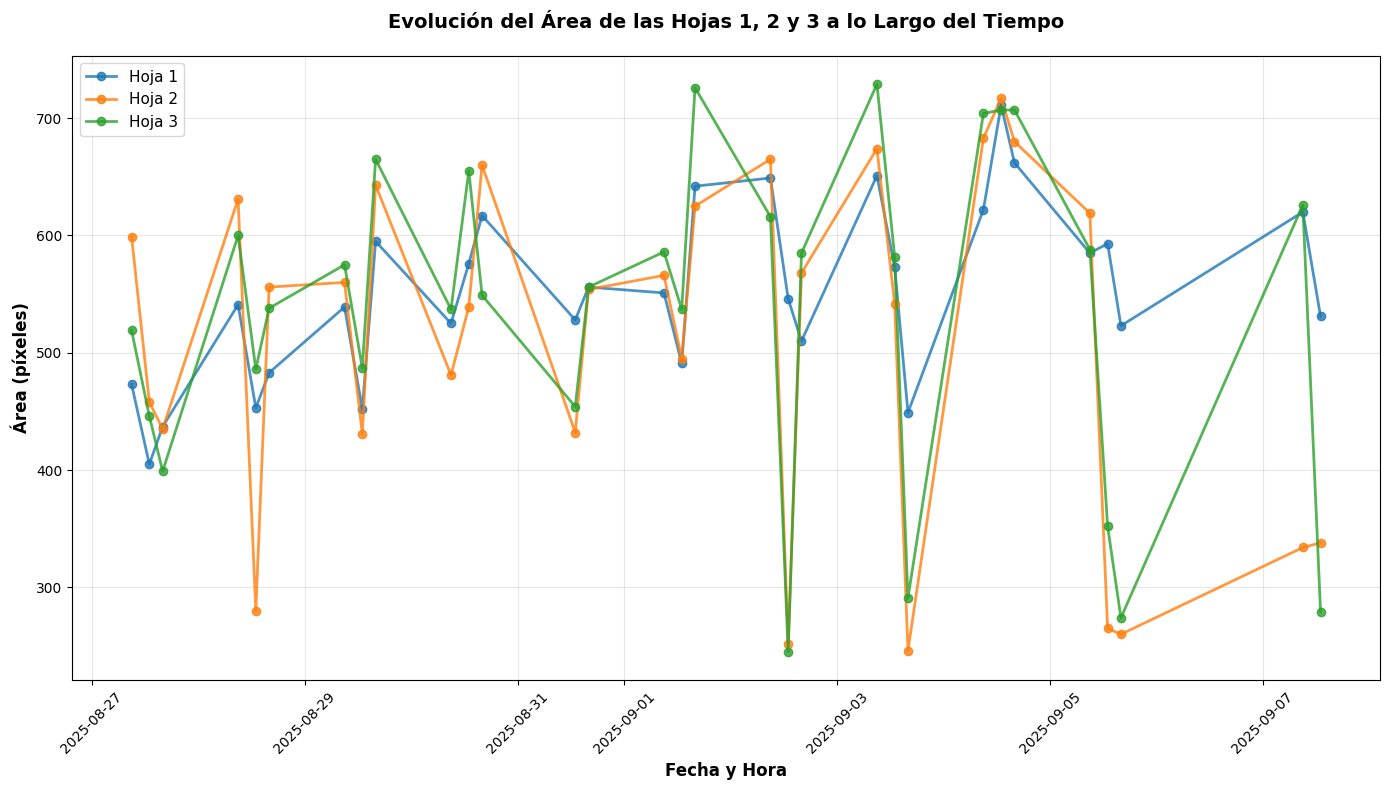

Hoja 1: 473 → 531 píxeles (+12.3%)
Hoja 2: 599 → 338 píxeles (-43.6%)
Hoja 3: 519 → 279 píxeles (-46.2%)


In [2]:


# Asegurar que timestamp esté en formato datetime
df_morfologicas['timestamp'] = pd.to_datetime(df_morfologicas['timestamp'])

# Filtrar solo las hojas 1, 2 y 3
hojas_deseadas = [1, 2, 3]
df_morfologicas_filtrado = df_morfologicas[df_morfologicas['hoja_id'].isin(hojas_deseadas)]

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
hojas = sorted(df_morfologicas_filtrado['hoja_id'].unique())

# Graficar cada hoja individualmente
for i, hoja_id in enumerate(hojas):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')  # Ordenar por tiempo
    
    plt.plot(hoja_data['timestamp'], hoja_data['area_plantcv'], 
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'Hoja {hoja_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Área (píxeles)', fontsize=12, fontweight='bold')
plt.title('Evolución del Área de las Hojas 1, 2 y 3 a lo Largo del Tiempo', 
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


for hoja_id in sorted(df_morfologicas_filtrado['hoja_id'].unique()):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')
    
    area_inicial = hoja_data['area_plantcv'].iloc[0]
    area_final = hoja_data['area_plantcv'].iloc[-1]
    crecimiento = area_final - area_inicial
    crecimiento_porcentual = (crecimiento / area_inicial) * 100
    
    print(f"Hoja {hoja_id}: {area_inicial:.0f} → {area_final:.0f} píxeles ({crecimiento_porcentual:+.1f}%)")


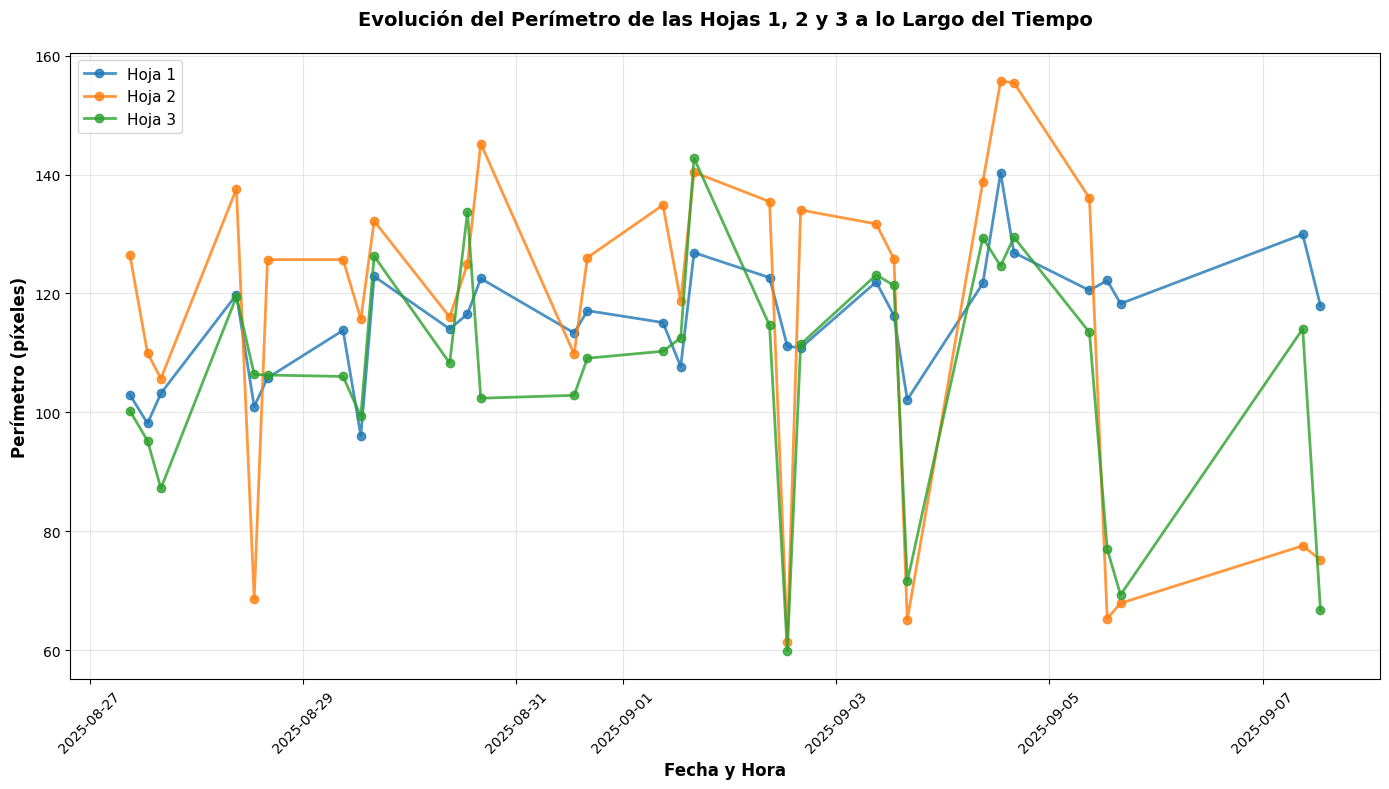

Análisis del cambio en perímetro:
----------------------------------------
Hoja 1: 103.0 → 117.9 píxeles (+14.5%)
Hoja 2: 126.5 → 75.2 píxeles (-40.6%)
Hoja 3: 100.3 → 66.7 píxeles (-33.5%)


In [3]:
# Gráfica temporal del perímetro para las hojas 1, 2 y 3
plt.figure(figsize=(14, 8))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
hojas = sorted(df_morfologicas_filtrado['hoja_id'].unique())

# Graficar cada hoja individualmente
for i, hoja_id in enumerate(hojas):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')  # Ordenar por tiempo
    
    plt.plot(hoja_data['timestamp'], hoja_data['perimetro_opencv'], 
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'Hoja {hoja_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Perímetro (píxeles)', fontsize=12, fontweight='bold')
plt.title('Evolución del Perímetro de las Hojas 1, 2 y 3 a lo Largo del Tiempo', 
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Análisis del cambio en perímetro
print("Análisis del cambio en perímetro:")
print("-" * 40)
for hoja_id in sorted(df_morfologicas_filtrado['hoja_id'].unique()):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')
    
    perimetro_inicial = hoja_data['perimetro_opencv'].iloc[0]
    perimetro_final = hoja_data['perimetro_opencv'].iloc[-1]
    cambio = perimetro_final - perimetro_inicial
    cambio_porcentual = (cambio / perimetro_inicial) * 100
    
    print(f"Hoja {hoja_id}: {perimetro_inicial:.1f} → {perimetro_final:.1f} píxeles ({cambio_porcentual:+.1f}%)")


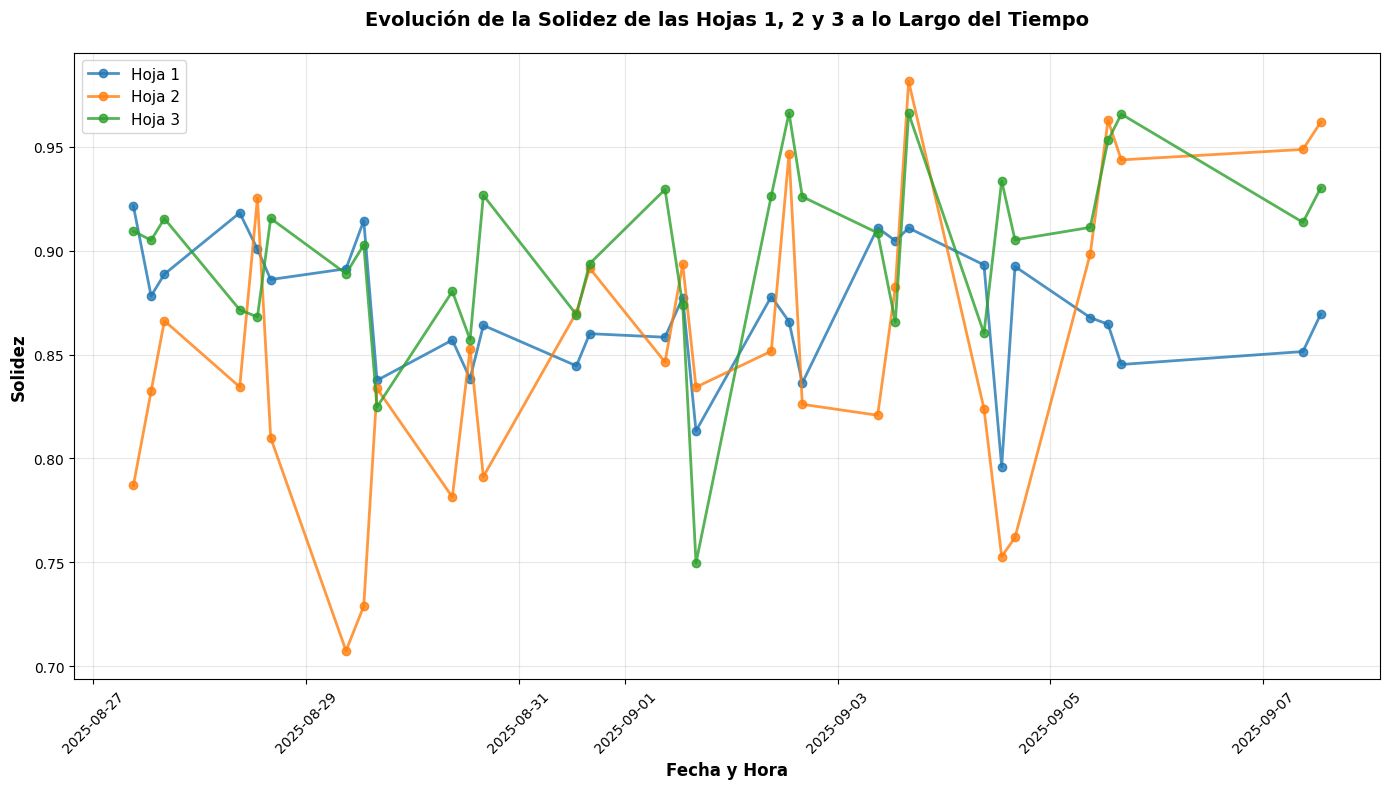

Análisis del cambio en solidez:
----------------------------------------
Hoja 1: 0.922 → 0.869 (-5.7%)
Hoja 2: 0.787 → 0.962 (+22.2%)
Hoja 3: 0.909 → 0.930 (+2.3%)

Información sobre la solidez:
----------------------------------------
• La solidez mide qué tan 'compacta' es la forma de la hoja
• Valores cercanos a 1.0 indican formas más regulares y compactas
• Valores más bajos indican formas más irregulares o con 'huecos'
• Cambios en la solidez pueden indicar deformaciones o crecimiento irregular


In [4]:
# Gráfica temporal de la solidez para las hojas 1, 2 y 3
plt.figure(figsize=(14, 8))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
hojas = sorted(df_morfologicas_filtrado['hoja_id'].unique())

# Graficar cada hoja individualmente
for i, hoja_id in enumerate(hojas):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')  # Ordenar por tiempo
    
    plt.plot(hoja_data['timestamp'], hoja_data['solidez_opencv'], 
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'Hoja {hoja_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Solidez', fontsize=12, fontweight='bold')
plt.title('Evolución de la Solidez de las Hojas 1, 2 y 3 a lo Largo del Tiempo', 
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Análisis del cambio en solidez
print("Análisis del cambio en solidez:")
print("-" * 40)
for hoja_id in sorted(df_morfologicas_filtrado['hoja_id'].unique()):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')
    
    solidez_inicial = hoja_data['solidez_opencv'].iloc[0]
    solidez_final = hoja_data['solidez_opencv'].iloc[-1]
    cambio = solidez_final - solidez_inicial
    cambio_porcentual = (cambio / solidez_inicial) * 100
    
    print(f"Hoja {hoja_id}: {solidez_inicial:.3f} → {solidez_final:.3f} ({cambio_porcentual:+.1f}%)")

# Información adicional sobre la solidez
print("\nInformación sobre la solidez:")
print("-" * 40)
print("• La solidez mide qué tan 'compacta' es la forma de la hoja")
print("• Valores cercanos a 1.0 indican formas más regulares y compactas")
print("• Valores más bajos indican formas más irregulares o con 'huecos'")
print("• Cambios en la solidez pueden indicar deformaciones o crecimiento irregular")


Métricas promedio por hoja:
         area_plantcv  perimetro_opencv  solidez_opencv
hoja_id                                                
1              551.26            115.47            0.87
2              509.29            115.78            0.85
3              535.48            106.27            0.90



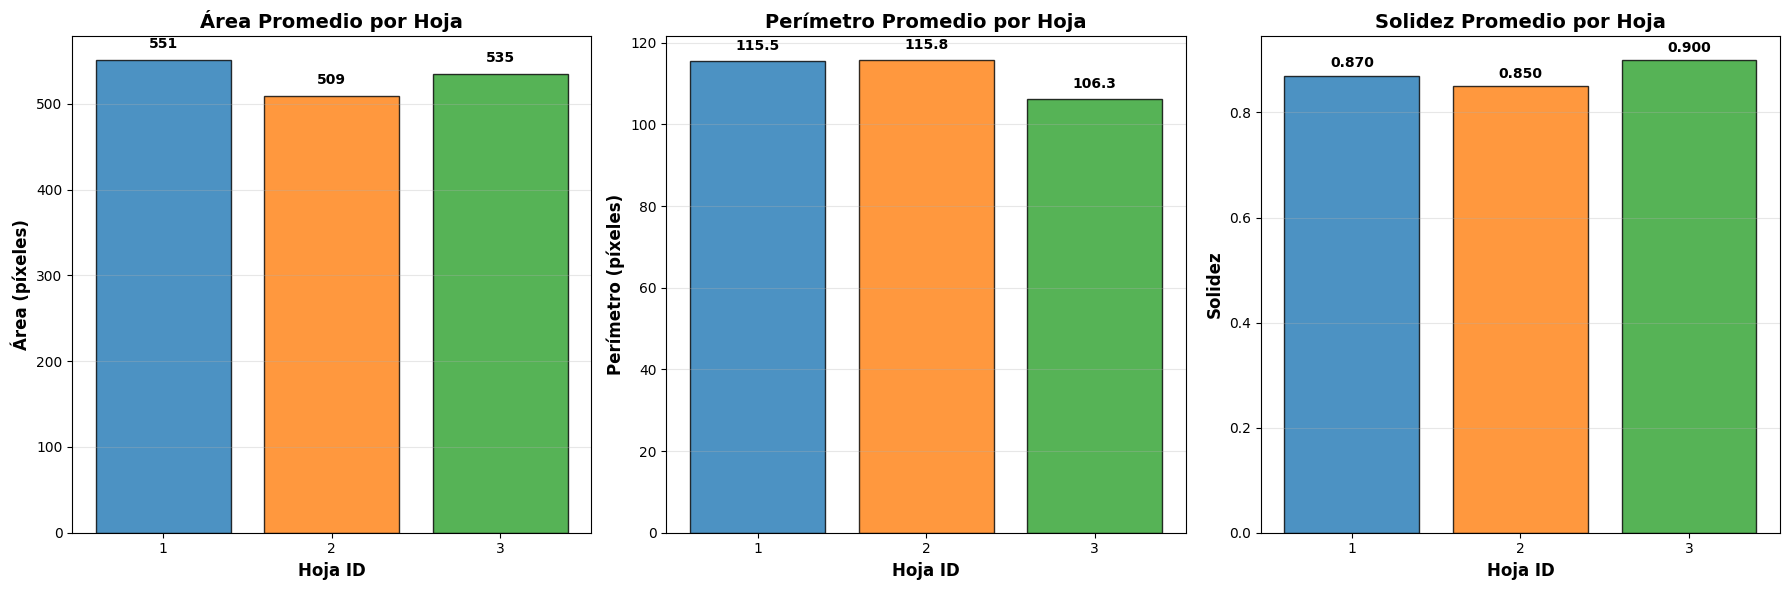


Análisis comparativo:
--------------------------------------------------
Area Plantcv:
  • Mayor: Hoja 1 (551.26)
  • Menor: Hoja 2 (509.29)
  • Diferencia: 41.97

Perimetro Opencv:
  • Mayor: Hoja 2 (115.78)
  • Menor: Hoja 3 (106.27)
  • Diferencia: 9.51

Solidez Opencv:
  • Mayor: Hoja 3 (0.90)
  • Menor: Hoja 2 (0.85)
  • Diferencia: 0.05



In [5]:

# Calcular promedios por hoja
metricas_promedio = df_morfologicas_filtrado.groupby('hoja_id').agg({
    'area_plantcv': 'mean',
    'perimetro_opencv': 'mean',
    'solidez_opencv': 'mean'
}).round(2)

print("Métricas promedio por hoja:")
print(metricas_promedio)
print("\n" + "="*50)

# Crear el gráfico de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
hojas = [1, 2, 3]

# Gráfico 1: Área promedio
axes[0].bar(hojas, metricas_promedio['area_plantcv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[0].set_title('Área Promedio por Hoja', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hoja ID', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Área (píxeles)', fontsize=12, fontweight='bold')
axes[0].set_xticks(hojas)
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['area_plantcv']):
    axes[0].text(hojas[i], v + 10, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Perímetro promedio
axes[1].bar(hojas, metricas_promedio['perimetro_opencv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('Perímetro Promedio por Hoja', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hoja ID', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Perímetro (píxeles)', fontsize=12, fontweight='bold')
axes[1].set_xticks(hojas)
axes[1].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['perimetro_opencv']):
    axes[1].text(hojas[i], v + 2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Solidez promedio
axes[2].bar(hojas, metricas_promedio['solidez_opencv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[2].set_title('Solidez Promedio por Hoja', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hoja ID', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Solidez', fontsize=12, fontweight='bold')
axes[2].set_xticks(hojas)
axes[2].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['solidez_opencv']):
    axes[2].text(hojas[i], v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis comparativo
print("\nAnálisis comparativo:")
print("-" * 50)

# Encontrar la hoja con mayor y menor valor para cada métrica
for metrica in ['area_plantcv', 'perimetro_opencv', 'solidez_opencv']:
    max_hoja = metricas_promedio[metrica].idxmax()
    min_hoja = metricas_promedio[metrica].idxmin()
    max_valor = metricas_promedio[metrica].max()
    min_valor = metricas_promedio[metrica].min()
    
    metrica_nombre = metrica.replace('_', ' ').title()
    print(f"{metrica_nombre}:")
    print(f"  • Mayor: Hoja {max_hoja} ({max_valor:.2f})")
    print(f"  • Menor: Hoja {min_hoja} ({min_valor:.2f})")
    print(f"  • Diferencia: {max_valor - min_valor:.2f}")
    print()


C:\Users\pipeb\AppData\Local\Temp\ipykernel_7740\114903795.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(areas_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'],
C:\Users\pipeb\AppData\Local\Temp\ipykernel_7740\114903795.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(perimetros_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'],
C:\Users\pipeb\AppData\Local\Temp\ipykernel_7740\114903795.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp3 = axes[2].boxplot(solidez_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'],


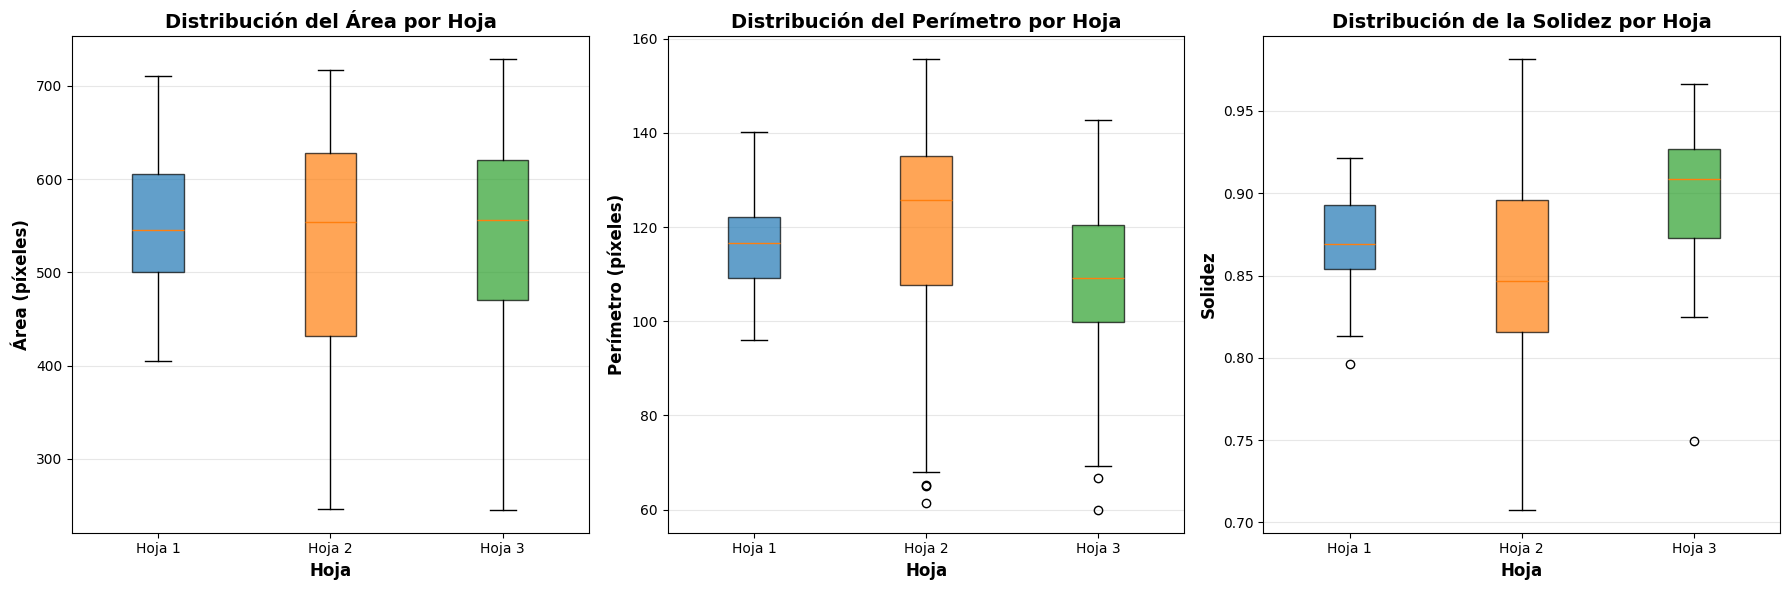

Análisis estadístico detallado por hoja:
Hojas disponibles en los datos: [np.int64(1), np.int64(2), np.int64(3)]
Total de registros: 93


HOJA 1 (n=31 registros):
------------------------------
Area Plantcv:
  • Media: 551.26
  • Mediana: 546.00
  • Desv. Estándar: 74.99
  • Mínimo: 405.00
  • Máximo: 711.00
  • Rango: 306.00
  • Coef. Variación: 13.6%

Perimetro Opencv:
  • Media: 115.47
  • Mediana: 116.53
  • Desv. Estándar: 10.01
  • Mínimo: 96.04
  • Máximo: 140.28
  • Rango: 44.24
  • Coef. Variación: 8.7%

Solidez Opencv:
  • Media: 0.87
  • Mediana: 0.87
  • Desv. Estándar: 0.03
  • Mínimo: 0.80
  • Máximo: 0.92
  • Rango: 0.13
  • Coef. Variación: 3.5%


HOJA 2 (n=31 registros):
------------------------------
Area Plantcv:
  • Media: 509.29
  • Mediana: 554.00
  • Desv. Estándar: 147.12
  • Mínimo: 246.00
  • Máximo: 717.00
  • Rango: 471.00
  • Coef. Variación: 28.9%

Perimetro Opencv:
  • Media: 115.78
  • Mediana: 125.70
  • Desv. Estándar: 28.37
  • Mínimo: 61.31
  • Máxim

In [6]:
# Boxplot por hoja - Distribución de cada métrica por hoja
# Configurar el estilo
plt.style.use('default')

# Crear el gráfico con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Preparar datos para boxplot
datos_boxplot = []
for hoja_id in [1, 2, 3]:
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id]
    datos_boxplot.append(hoja_data)

# Gráfico 1: Área
areas_por_hoja = [hoja['area_plantcv'].values for hoja in datos_boxplot]
bp1 = axes[0].boxplot(areas_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'], 
                      patch_artist=True, showfliers=True)
axes[0].set_title('Distribución del Área por Hoja', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hoja', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Área (píxeles)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Colorear las cajas
for patch, color in zip(bp1['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Gráfico 2: Perímetro
perimetros_por_hoja = [hoja['perimetro_opencv'].values for hoja in datos_boxplot]
bp2 = axes[1].boxplot(perimetros_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'], 
                      patch_artist=True, showfliers=True)
axes[1].set_title('Distribución del Perímetro por Hoja', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hoja', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Perímetro (píxeles)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Colorear las cajas
for patch, color in zip(bp2['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Gráfico 3: Solidez
solidez_por_hoja = [hoja['solidez_opencv'].values for hoja in datos_boxplot]
bp3 = axes[2].boxplot(solidez_por_hoja, labels=['Hoja 1', 'Hoja 2', 'Hoja 3'], 
                      patch_artist=True, showfliers=True)
axes[2].set_title('Distribución de la Solidez por Hoja', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hoja', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Solidez', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

# Colorear las cajas
for patch, color in zip(bp3['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Análisis estadístico detallado
print("Análisis estadístico detallado por hoja:")
print("=" * 60)

# Verificar que tenemos datos para todas las hojas
hojas_disponibles = sorted(df_morfologicas_filtrado['hoja_id'].unique())
print(f"Hojas disponibles en los datos: {hojas_disponibles}")
print(f"Total de registros: {len(df_morfologicas_filtrado)}")
print()

for hoja_id in hojas_disponibles:
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['hoja_id'] == hoja_id]
    print(f"\nHOJA {hoja_id} (n={len(hoja_data)} registros):")
    print("-" * 30)
    
    for metrica in ['area_plantcv', 'perimetro_opencv', 'solidez_opencv']:
        if metrica in hoja_data.columns:
            datos = hoja_data[metrica]
            metrica_nombre = metrica.replace('_', ' ').title()
            
            print(f"{metrica_nombre}:")
            print(f"  • Media: {datos.mean():.2f}")
            print(f"  • Mediana: {datos.median():.2f}")
            print(f"  • Desv. Estándar: {datos.std():.2f}")
            print(f"  • Mínimo: {datos.min():.2f}")
            print(f"  • Máximo: {datos.max():.2f}")
            print(f"  • Rango: {datos.max() - datos.min():.2f}")
            print(f"  • Coef. Variación: {(datos.std()/datos.mean()*100):.1f}%")
            print()
        else:
            print(f"Advertencia: La métrica {metrica} no está disponible para la Hoja {hoja_id}")

# Información sobre boxplots
print("Interpretación de los boxplots:")
print("=" * 40)
print("• La caja muestra el rango intercuartílico (IQR)")
print("• La línea en la caja es la mediana")
print("• Los 'bigotes' muestran el rango de datos normales")
print("• Los puntos fuera de los bigotes son valores atípicos")
print("• Cajas más anchas = mayor variabilidad")
print("• Cajas más estrechas = datos más consistentes")
